In [29]:
import pandas as pd
import numpy as np
import random as rnd
import os
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')
os.listdir('../input')

['new_na2.csv']

In [30]:
train = pd.read_csv('../input/new_na2.csv')


In [77]:
def regularization_mean_std_d(data_arr):
    mean = np.mean(data_arr)
    std = np.std(data_arr) 
    regularaz_arr = (data_arr - mean)/std
    return regularaz_arr

In [98]:
def regularization_log_d(data_arr):
    return np.log(data_arr)

In [135]:
def regularization_l2(data_arr):
    return (data_arr/ np.linalg.norm(data_arr))

bldng_us_clssfctn 우선 배제 및 id 드랍

In [31]:
train =train.drop(columns=['bldng_us_clssfctn'])
train =train.drop(columns=['id','dt_of_fr'])

In [32]:
train.head()

,fr_yn,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,ttl_dwn_flr,...,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,month,year,day,time,wnd
0,Y,단독주택,블록구조,3,69.42,69.42,0.0,1977,1,0,...,1891,29231,11322,88,0,10,2017,20,5,SSW
1,N,단독주택,일반목구조,3,46.29,46.29,0.0,1961,1,0,...,4533,20480,3369,7727,0,9,2018,30,8,NNE
2,Y,공동주택,철근콘크리트구조,1,583.80,2516.76,1446.0,2000,5,0,...,277,31197,12451,72,14,10,2016,30,14,E
3,N,단독주택,일반목구조,2,48.92,48.92,0.0,1936,1,0,...,438,4270,407,508,11,6,2016,14,5,N
4,N,단독주택,일반목구조,2,0.00,0.00,0.0,1948,1,0,...,1702,29778,12487,707,0,4,2018,22,5,N


fr_yn => Y==1, N==0

In [33]:
binary_y = {'N': 0, 'Y': 1}
train['fr_yn'] = train['fr_yn'].map(binary_y)

In [34]:
for col in train.columns:
    null_count = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (train[col].isnull().sum() / train[col].shape[0]))
    print(null_count)

column:      fr_yn	 Percent of NaN value: 0.00%
column:   bldng_us	 Percent of NaN value: 0.00%
column: bldng_archtctr	 Percent of NaN value: 0.00%
column:  bldng_cnt	 Percent of NaN value: 0.00%
column:   bldng_ar	 Percent of NaN value: 0.00%
column:     ttl_ar	 Percent of NaN value: 0.00%
column:     lnd_ar	 Percent of NaN value: 0.00%
column: dt_of_athrztn	 Percent of NaN value: 0.00%
column: ttl_grnd_flr	 Percent of NaN value: 0.00%
column: ttl_dwn_flr	 Percent of NaN value: 0.00%
column:     tmprtr	 Percent of NaN value: 0.00%
column:    prcpttn	 Percent of NaN value: 0.00%
column:    wnd_spd	 Percent of NaN value: 0.00%
column:  wnd_drctn	 Percent of NaN value: 0.00%
column:       hmdt	 Percent of NaN value: 0.00%
column: gas_engry_us_201401	 Percent of NaN value: 0.00%
column: ele_engry_us_201401	 Percent of NaN value: 0.00%
column: gas_engry_us_201402	 Percent of NaN value: 0.00%
column: ele_engry_us_201402	 Percent of NaN value: 0.00%
column: gas_engry_us_201403	 Percent of Na

In [35]:
train.describe(include=['O'])

,bldng_us,bldng_archtctr,wnd_drctn,jmk,rgnl_ar_nm,rgnl_ar_nm2,lnd_us_sttn_nm,rd_sd_nm,emd_nm,mlt_us_yn,wnd
count,58694,58694,58694,58694,58694,58694,58694,58694,58694,58694,58694
unique,34,18,21,26,23,19,44,13,289,2,17
top,단독주택,일반목구조,0,대,계획관리지역,지정되지않음,단독,세로한면(가),경상남도 거창군 거창읍,N,N
freq,40044,14015,6808,45116,25778,57655,34993,21368,896,58512,10666


In [36]:
bldng_us_arr = train['bldng_us'].unique()

In [37]:
train['bldng_us'].value_counts()

단독주택          40044
제1종근린생활시설      3429
창고시설           3306
동.식물 관련시설      3213
제2종근린생활시설      2810
공장             1982
공동주택           1408
종교시설            424
교육연구시설          311
숙박시설            296
노유자시설           249
위험물저장및처리시설      223
자동차관련시설         197
업무시설            152
관광휴게시설          105
분뇨.쓰레기처리시설       87
판매시설             62
운동시설             60
문화및집회시설          59
묘지관련시설           43
위락시설             37
근린생활시설           34
의료시설             30
발전시설             26
교육연구및복지시설        23
방송통신시설           22
수련시설             21
교정및군사시설          16
운수시설             12
공공용시설             7
장례식장              3
시장                1
판매및영업시설           1
파출소               1
Name: bldng_us, dtype: int64

<h3>bldng_us</h3>

Text(0.5, 1.0, 'bldng_us')

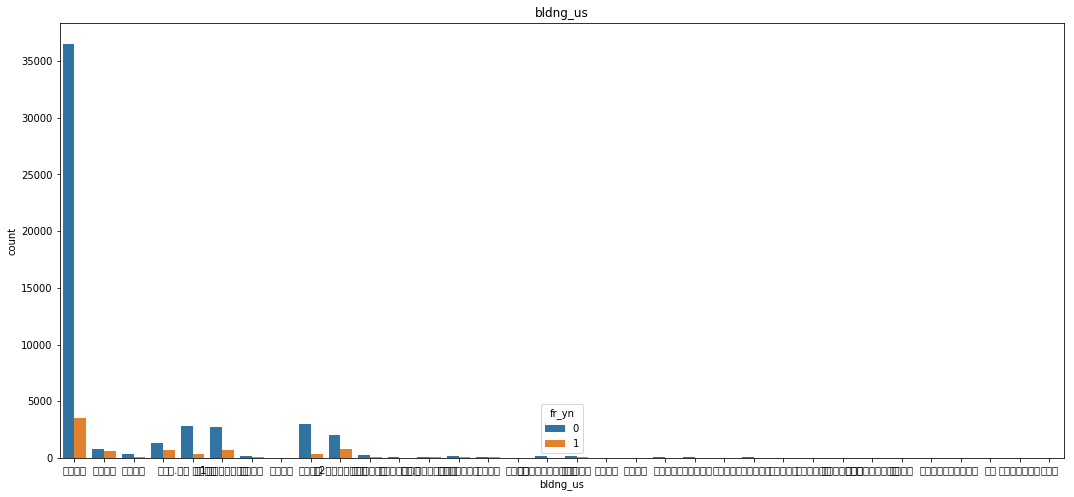

In [38]:
f,ax = plt.subplots(1,1,figsize=(18,8))
sns.countplot('bldng_us',hue='fr_yn',data=train)
plt.title("bldng_us")

<h3>bldng_archtctr</h3>

In [39]:
train['bldng_archtctr'].value_counts()

일반목구조          14015
벽돌구조           13061
블록구조           10172
철근콘크리트구조        9639
경량철골구조          6748
일반철골구조          2971
강파이프구조           704
조적구조             673
기타조적구조           321
석구조               99
기타강구조             72
철골철근콘크리트구조        48
기타구조              48
목구조               43
철골콘크리트구조          41
통나무구조             20
프리케스트콘크리트구조       18
기타콘크리트구조           1
Name: bldng_archtctr, dtype: int64

Text(0.5, 1.0, 'bldng_archtctr')

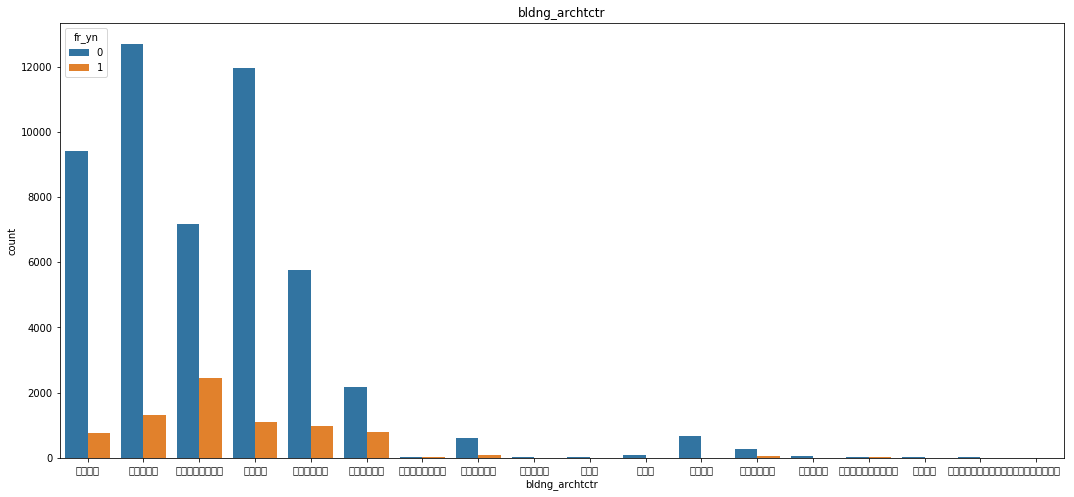

In [40]:
f,ax = plt.subplots(1,1,figsize=(18,8))
sns.countplot('bldng_archtctr',hue='fr_yn',data=train)
plt.title("bldng_archtctr")

<h3>바람 방향</h3>

In [41]:
train['wnd_drctn'].value_counts()

0       6808
none    5074
360     3857
20      3554
250     3533
50      3429
290     3429
270     3344
340     3244
230     3193
200     2857
320     2654
70      2510
180     2353
110     2276
140     2262
160     2238
90      2076
40         1
30         1
10         1
Name: wnd_drctn, dtype: int64

Text(0.5, 1.0, 'wnd_drctn')

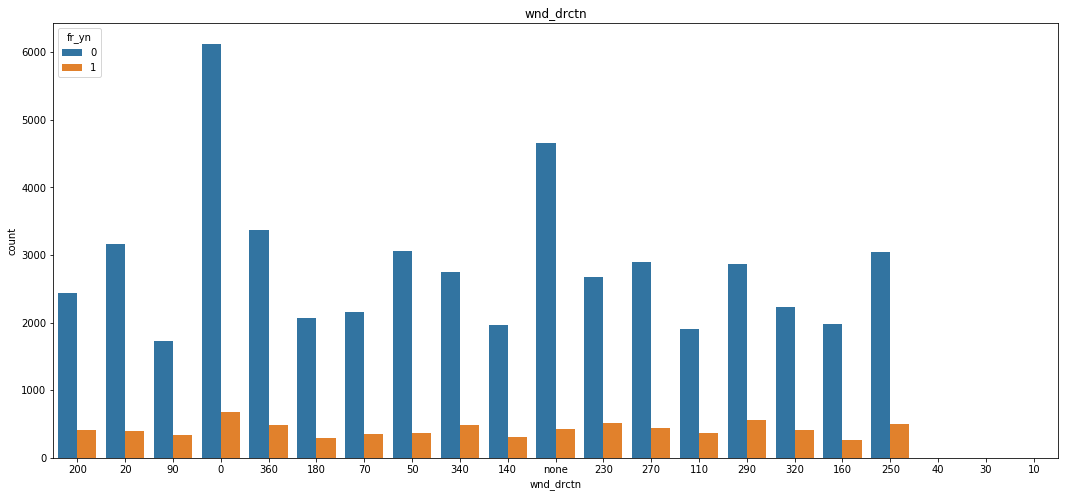

In [42]:
f,ax = plt.subplots(1,1,figsize=(18,8))
sns.countplot('wnd_drctn',hue='fr_yn',data=train)
plt.title("wnd_drctn")

<h3>wnd</h3>

Text(0.5, 1.0, 'wnd')

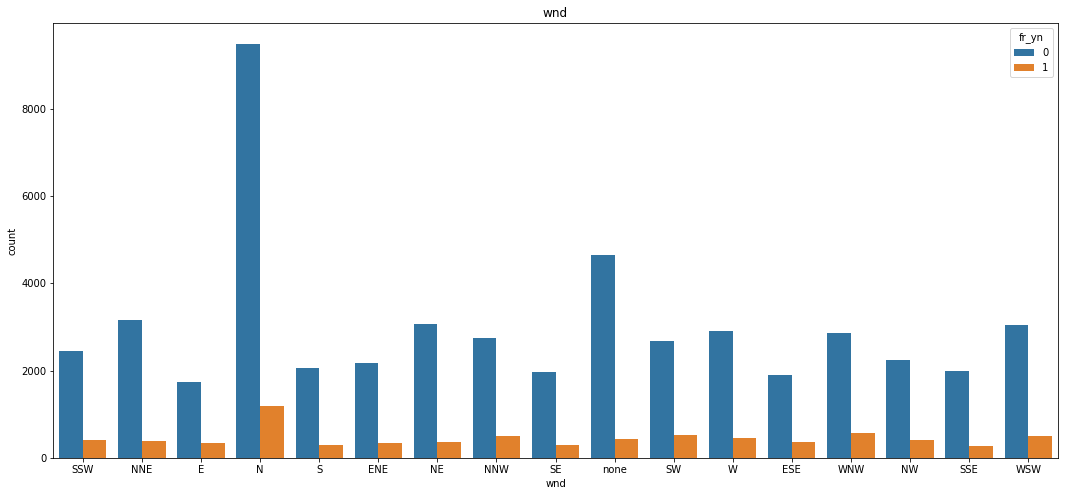

In [43]:
f,ax = plt.subplots(1,1,figsize=(18,8))
sns.countplot('wnd',hue='fr_yn',data=train)
plt.title("wnd")

In [44]:
train['wnd'].value_counts()

N       10666
none     5074
NNE      3555
WSW      3533
NE       3430
WNW      3429
W        3344
NNW      3244
SW       3193
SSW      2857
NW       2654
ENE      2510
S        2353
ESE      2276
SE       2262
SSE      2238
E        2076
Name: wnd, dtype: int64

In [45]:
wnd = pd.get_dummies(train['wnd'])

In [46]:
wnd

,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,none
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58689,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
58690,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
58691,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
58692,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


<h3>풍향</h3>

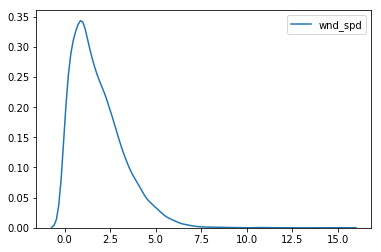

In [47]:
sns.kdeplot(train[train['fr_yn']==1]['wnd_spd'])

<h3>해당 지점에서 50미터 내의 빌딩 개수</h3>

Text(0.5, 1.0, 'bldng_cnt_in_50m')

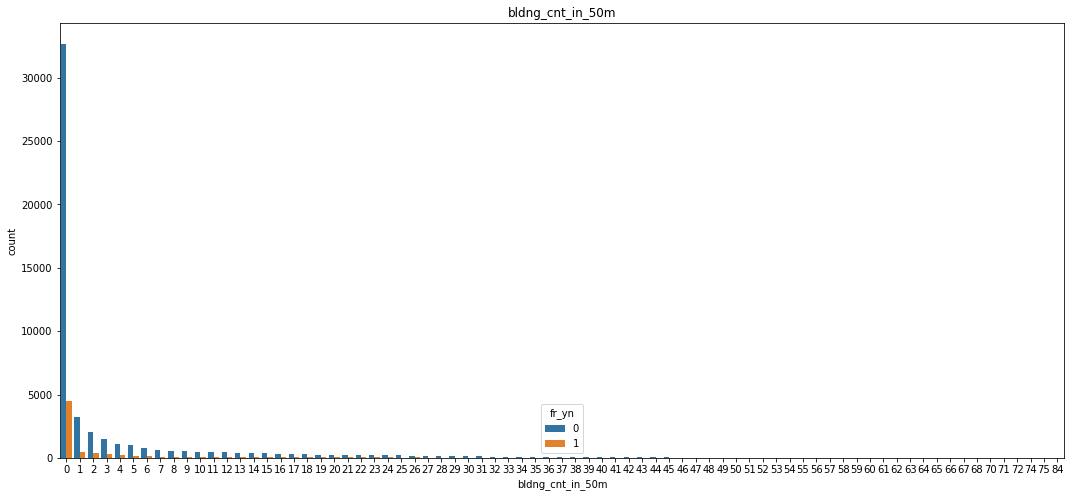

In [48]:
f,ax = plt.subplots(1,1,figsize=(18,8))
sns.countplot('bldng_cnt_in_50m',hue='fr_yn',data=train)
plt.title("bldng_cnt_in_50m")

In [49]:
pd.crosstab(train['bldng_cnt_in_50m'],train['fr_yn']==1).style.background_gradient(cmap="summer_r")

fr_yn,False,True
bldng_cnt_in_50m,,
0,32683,4525
1,3265,496
2,2068,357
3,1515,291
4,1117,197
5,992,176
6,764,132
7,656,90
8,575,93


<h3>**금연 구역과의 거리 단위 미터**</h3>

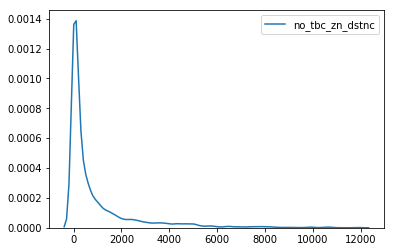

In [50]:
sns.kdeplot(train[train['fr_yn']==1]['no_tbc_zn_dstnc'])

In [51]:
bldng_us_one_hot = pd.get_dummies(train['bldng_us'])

<h3>안전 비상벨과의 거리</h3>

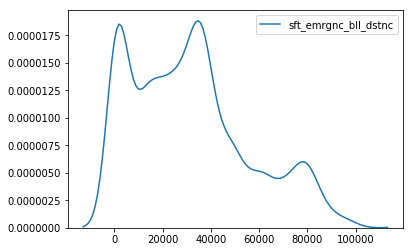

In [55]:
sns.kdeplot(train[train['fr_yn']==1]['sft_emrgnc_bll_dstnc'])

In [63]:
sft_emrgnc_bll_dstnc_arr = np.log(np.asarray(train[train['fr_yn']==1]['sft_emrgnc_bll_dstnc']))

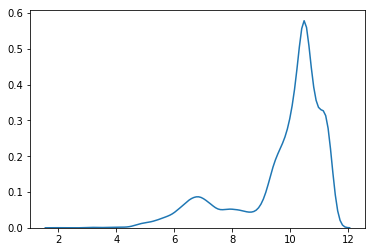

In [66]:
sns.kdeplot(sft_emrgnc_bll_dstnc_arr)

<h3>소화기와의 거리</h3>

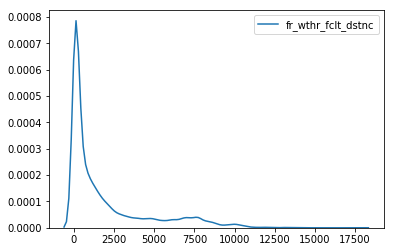

In [67]:
sns.kdeplot(train['fr_wthr_fclt_dstnc'])

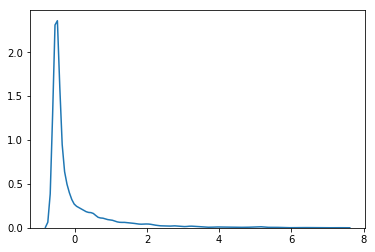

In [78]:
fr_wthr_fclt_dstnc_arr = (np.asarray(train[train['fr_yn']==1]['fr_wthr_fclt_dstnc']))
fr_wthr_fclt_dstnc_arr_d_s = regularization_mean_std_d(fr_wthr_fclt_dstnc_arr)
sns.kdeplot(fr_wthr_fclt_dstnc_arr_d_s)

<h3>cctv_in_100m</h3>

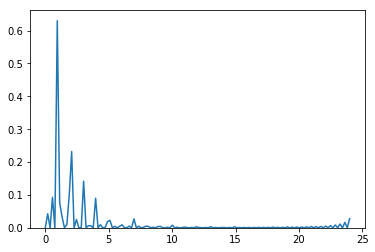

In [104]:
sns.kdeplot(np.asarray(train[train['fr_yn']==1]['cctv_in_100m']))

In [102]:
cctv_in_100m_reg_log =regularization_log_d(np.asarray(train[train['fr_yn']==1]['cctv_in_100m']))

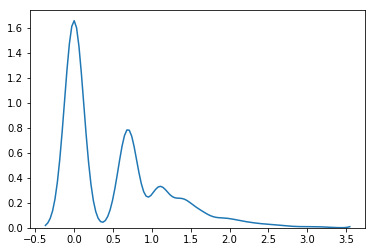

In [103]:
sns.kdeplot(cctv_in_100m_reg_log)

<h3>심장어쩌고와의 거리</h3>

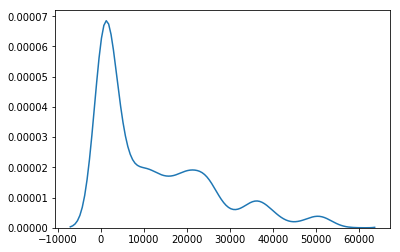

In [106]:
sns.kdeplot(np.asarray(train[train['fr_yn']==1]['ahsm_dstnc']))

In [107]:
ahsm_dstnc_mean_std_d = regularization_mean_std_d(train[train['fr_yn']==1]['ahsm_dstnc'])

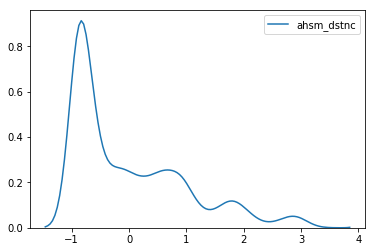

In [109]:
sns.kdeplot(ahsm_dstnc_mean_std_d)

 <h3>다중이용시설 포함 여부</h3>

In [114]:
#binary_y = {'N': 0, 'Y': 1}
train['mlt_us_yn'] = train['mlt_us_yn'].map(binary_y)

Text(0.5, 1.0, 'mlt_us_yn')

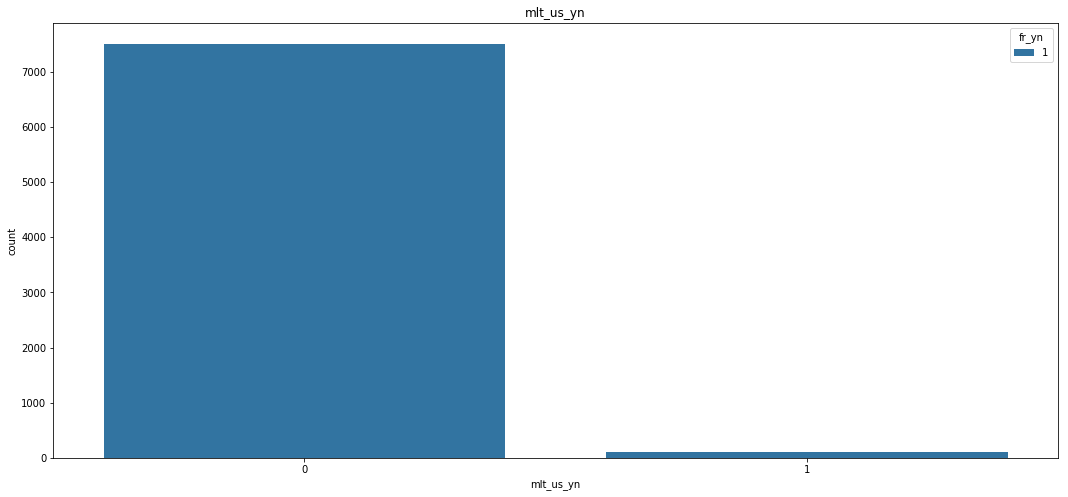

In [122]:
f,ax = plt.subplots(1,1,figsize=(18,8))
sns.countplot('mlt_us_yn',hue='fr_yn',data=train[train['fr_yn']==1])
plt.title("mlt_us_yn")

<h3>소방서 관할 인원</h3>

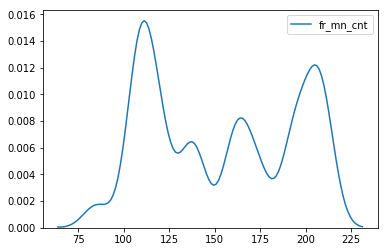

In [125]:
#train['fr_mn_cnt'].head()
sns.kdeplot(train[train['fr_yn']==1]['fr_mn_cnt'])

In [156]:
fr_mn_cn_log = regularization_log_d(train[train['fr_yn']==1]['fr_mn_cnt'])

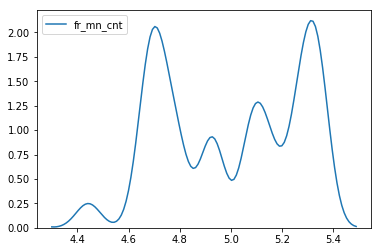

In [155]:
sns.kdeplot(fr_mn_cn_log)